In [38]:
import scipy as sp
import sympy as sym
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

In [5]:
%matplotlib widget

Below you will find the equation used for logistic map;

In [6]:
x_n, x_n1, r = sym.symbols('x_n x_n+1 r')
log_map = sym.Eq(x_n1, r*x_n*(1 - x_n))
log_map

Eq(x_n+1, r*x_n*(1 - x_n))

In [7]:
def f(x_n, r):
    return r*x_n*(1 - x_n)

In [8]:
def x_n_vs_x_n1(r, iterable):
    x0 = np.arange(0,1.01,0.01)
    x = np.arange(0,1.01,0.01)
    plt.figure()
    for i in range(iterable):
        plt.plot(x0, f(x, r))
        x = f(x, r)
    plt.title(f"r = {r}")
    plt.xlabel("$x_n$")
    plt.ylabel("$x_{n+1}$")
    plt.show()

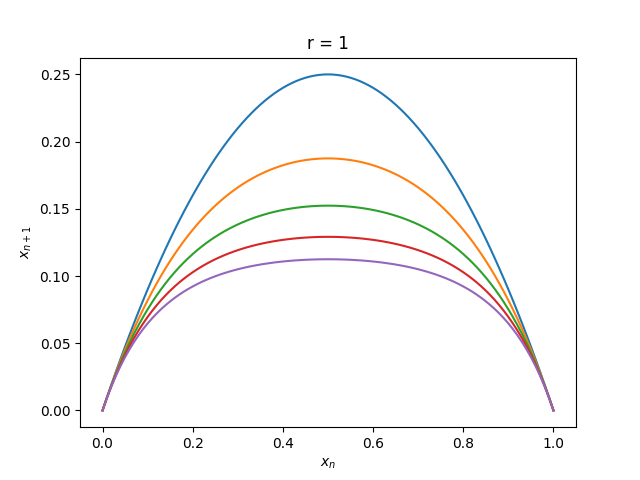

In [9]:
x_n_vs_x_n1(1, 5)

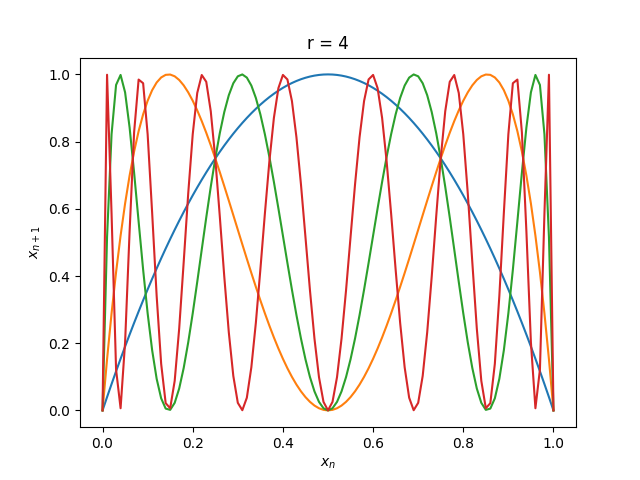

In [10]:
x_n_vs_x_n1(4,4)

In [49]:
def g(ini_pop, r):
    time = np.arange(0,10001,1)
    pop = []
    pop.append(f(ini_pop, r))
    if r >= 3:
        time = np.arange(0,61,1)
    for i in range(len(time)-1):
        pop.append(f(pop[i], r))
        if 0.99999 < pop[i]/pop[i-1] < 1.00001 or pop[-1] == 0:
            break
    return pop

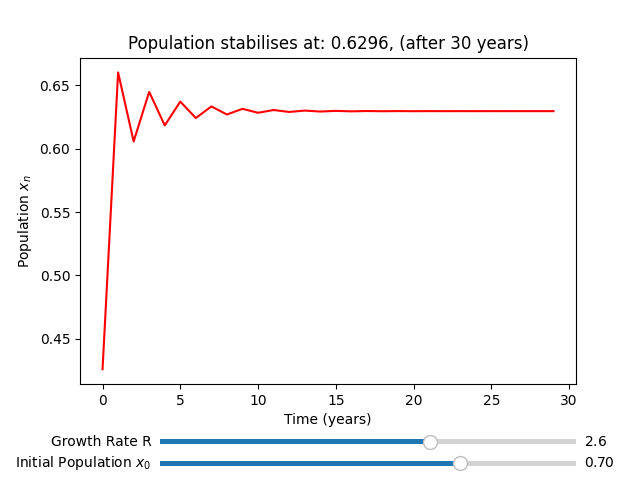

In [88]:
ini_pop = rand.random()
r  = 2.7
if not 0 <= ini_pop <= 1:
    print("Initial population must be between (or including) 0 and 1!")

time = np.arange(0,1001,1)
pop = g(ini_pop, r)

time = time[:len(pop)]

fig, ax = plt.subplots()
plt.subplots_adjust(bottom = 0.2)
line, = plt.plot(time, pop, color='red')
plt.ylabel('Population $x_n$')
plt.xlabel('Time (years)')
ax.set_title(f"Population stabilises at: {round(pop[-1], 4)}, (after {len(pop)} years)")

ax_r = plt.axes([0.25, 0.07, 0.65, 0.02])
r_factor = Slider(ax_r, 'Growth Rate R', valmin= 0, valmax= 4, valinit= 2.6, valstep= 0.1)

ax_ini_pop = plt.axes([0.25, 0.025, 0.65, 0.02])
ini_pop_factor = Slider(ax_ini_pop, 'Initial Population $x_0$', valmin= 0.05, valmax= 0.95, valinit= 0.7, valstep= 0.01)

def update(val):
    data = g(ini_pop_factor.val, r_factor.val)
    line.set_ydata(data)
    line.set_xdata(np.arange(0,len(data),1))
    if r_factor.val < 3:
        ax.set_title(f"Population stabilises at: {round(data[-1], 4)}, (after {len(data)} years)")
    else:
        ax.set_title('The stable value is now bifurcated')
    ax.relim()
    ax.autoscale_view()
    #print(f"The population value stabilises at: {data[-1]}, (after {len(data)} years).")
    
    fig.canvas.draw_idle()

r_factor.on_changed(update)
ini_pop_factor.on_changed(update)
    
plt.show()